In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv("HOMEPRICE.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


# Data cleaning
## filling of the missing value 

In [3]:
import math
bedrooms_median = math.floor(df.bedrooms.median())
bedrooms_median

3

In [6]:
bedrooms = df.bedrooms.fillna(bedrooms_median, inplace=True)

In [7]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
df.describe()

,area,bedrooms,age,price
count,5.000000,5.000000,5.00000,5.000000
mean,3280.000000,3.600000,18.20000,616000.000000
std,540.370243,0.894427,8.01249,83919.604384
min,2600.000000,3.000000,8.00000,550000.000000
25%,3000.000000,3.000000,15.00000,565000.000000
50%,3200.000000,3.000000,18.00000,595000.000000
75%,3600.000000,4.000000,20.00000,610000.000000
max,4000.000000,5.000000,30.00000,760000.000000


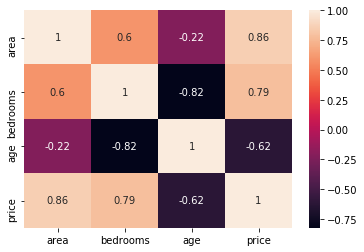

In [17]:
sns.heatmap(df.corr(), annot=True)

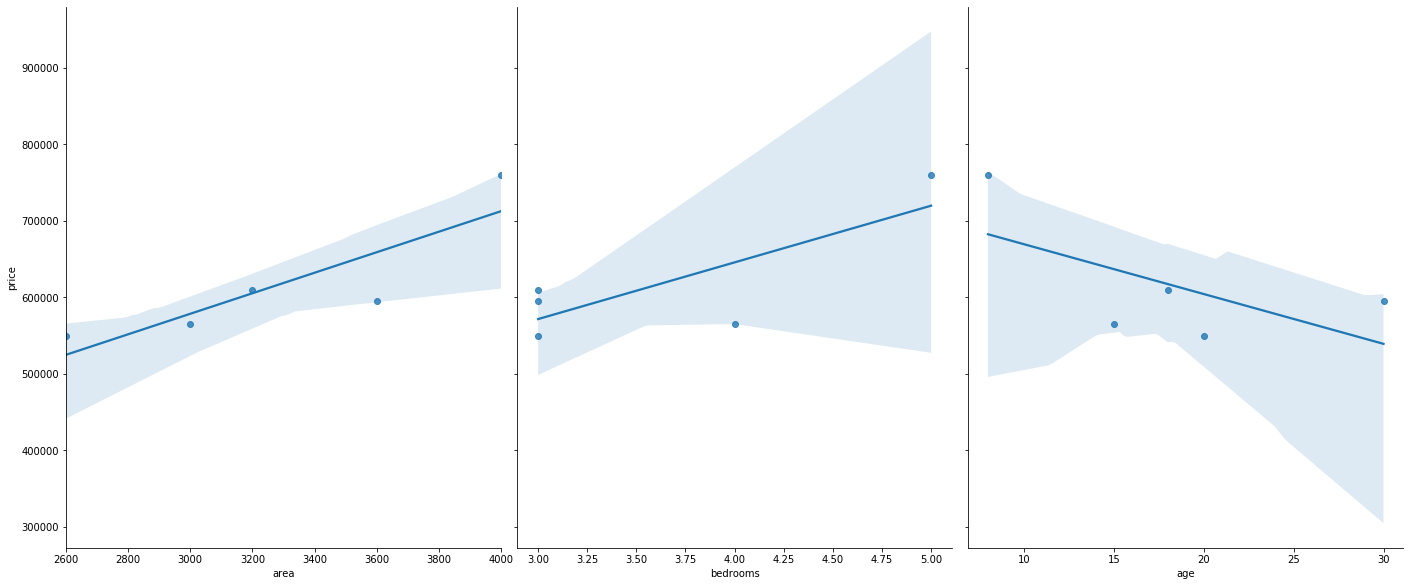

In [13]:
sns.pairplot(df, x_vars=["area","bedrooms","age"], y_vars="price", height=8, aspect=0.8, kind="reg")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[["area","bedrooms","age"]], df.price) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [15]:
reg.intercept_

383724.9999999998

## predicting 3000 sqr ft area, 3 bedrooms and 40years old

In [18]:
reg.predict([[3000,3,40]])

array([444400.])

## predicting 2500 sqr ft area, 4bedrooms and 5years old 

In [19]:
reg.predict([[2500,3,40]])

array([375775.])